In [ ]:
#Nama : Yosua Eben Haezer Momongan
#NIM  : 215314148

In [ ]:
#pada program berikut saya menggunakan dataset Bitcoin USD dari may-04-2023 
#sampai may-04-2024
#saya menggunakan variabel dependen 'close'
#saya menggunakan refrensi dalam membuat program ini yaitu: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ dan chat gpt untuk mengoreksi kesalahaan yang saya tidak mengerti


In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

C:\Users\user\AppData\Local\Temp\ipykernel_9540\4280831340.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


C:\Users\user\AppData\Local\Temp\ipykernel_9540\2783187049.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("D:\Kuliah\SMSTR 6\Time_Series\BTC-USD.csv", header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


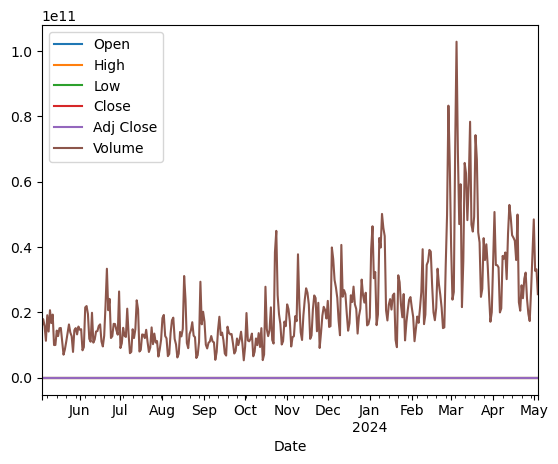

                    Open          High           Low         Close  \
Date                                                                 
2023-05-04  29031.304688  29353.185547  28694.039063  28847.710938   
2023-05-05  28851.480469  29668.908203  28845.509766  29534.384766   
2023-05-06  29538.859375  29820.126953  28468.966797  28904.623047   
2023-05-07  28901.623047  29157.517578  28441.367188  28454.978516   
2023-05-08  28450.457031  28663.271484  27310.134766  27694.273438   

               Adj Close       Volume  
Date                                   
2023-05-04  28847.710938  15548678514  
2023-05-05  29534.384766  17936566518  
2023-05-06  28904.623047  15913866714  
2023-05-07  28454.978516  11301355486  
2023-05-08  27694.273438  19122903752  


In [2]:
from datetime import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = read_csv("D:\Kuliah\SMSTR 6\Time_Series\BTC-USD.csv", header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.plot()
pyplot.show()
series.index = series.index.to_period()
print(series.head())


In [3]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

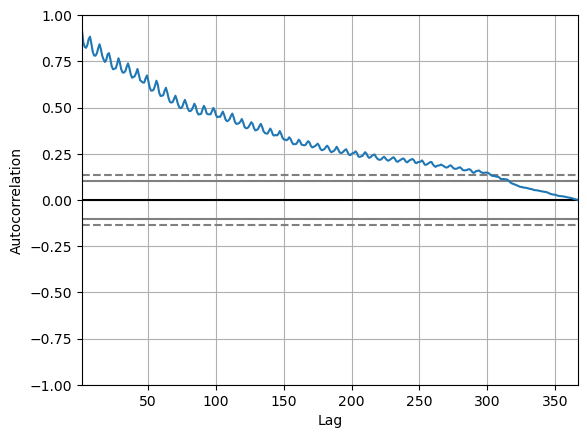

In [4]:
autocorrelation_plot(series)
pyplot.show()

In [5]:
# walk-forward validation
# Menggunakan kolom 'Close' sebagai variabel dependen
endog = series['Close']

# Inisialisasi list untuk menyimpan prediksi
predictions = []

# Split data menjadi data pelatihan dan data uji
train_size = int(len(endog) * 0.8)  # Menggunakan 80% data untuk pelatihan
train, test = endog[:train_size], endog[train_size:]

# Inisialisasi list untuk menyimpan history
history = [x for x in train]

# Loop untuk melakukan walk-forward validation
for t in range(len(test)):
    # Membuat model ARIMA dengan data historis
    model = ARIMA(history, order=(5,1,0))
    
    # Menyesuaikan model ke data historis
    model_fit = model.fit()
    
    # Melakukan prediksi untuk satu langkah ke depan
    output = model_fit.forecast()
    
    # Mengambil nilai prediksi
    yhat = output[0]
    
    # Menambahkan prediksi ke dalam list predictions
    predictions.append(yhat)
    
    # Mengupdate data historis dengan observasi aktual dari data uji
    obs = test[t]
    history.append(obs)
    
    # Menampilkan hasil prediksi dan observasi aktual
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=52301.336657, expected=51839.179688
predicted=51826.816897, expected=51304.972656
predicted=51325.941182, expected=50731.949219
predicted=50688.919589, expected=51571.101563
predicted=51560.218218, expected=51733.238281
predicted=51748.725363, expected=54522.402344
predicted=54543.860885, expected=57085.371094
predicted=57205.053383, expected=62504.789063
predicted=63065.959520, expected=61198.382813
predicted=61432.974758, expected=62440.632813
predicted=62362.738860, expected=62029.847656
predicted=61948.552193, expected=63167.371094
predicted=63176.464998, expected=68330.414063
predicted=68490.990005, expected=63801.199219
predicted=64289.570211, expected=66106.804688
predicted=65704.566417, expected=66925.484375
predicted=66821.939021, expected=68300.093750
predicted=68924.962977, expected=68498.882813
predicted=68175.137181, expected=69019.789063
predicted=69224.725326, expected=72123.906250
predicted=72159.924075, expected=71481.289063
predicted=71855.342429, expected=7

In [6]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2293.331


In [7]:
# fit model
# Menggunakan kolom 'Close' sebagai variabel dependen
endog = series['Close']

# Membuat model ARIMA
model = ARIMA(endog, order=(5,1,0))

# Menyesuaikan model ke data
model_fit = model.fit()

In [8]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  367
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3117.693
Date:                Sun, 05 May 2024   AIC                           6247.386
Time:                        00:49:17   BIC                           6270.802
Sample:                    05-04-2023   HQIC                          6256.691
                         - 05-04-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0689      0.025     -2.743      0.006      -0.118      -0.020
ar.L2         -0.0044      0.036     -0.123      0.902      -0.074       0.066
ar.L3          0.0414      0.036      1.162      0.2

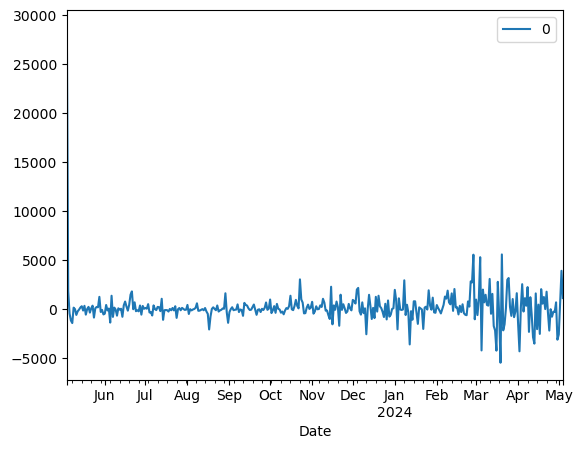

In [9]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

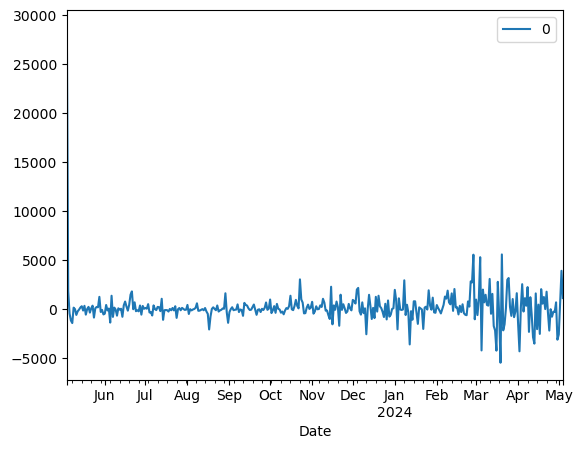

In [10]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

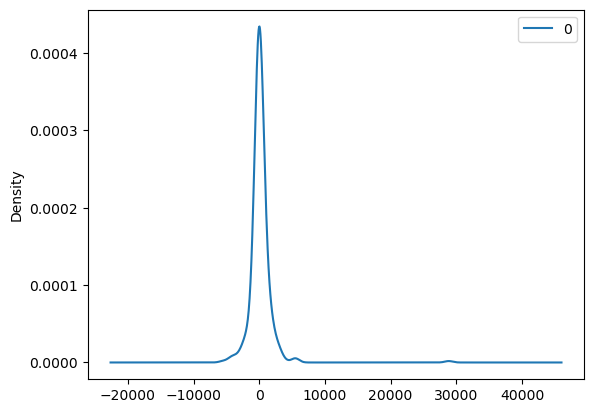

In [11]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [12]:
# summary stats of residuals
print(residuals.describe())

                  0
count    367.000000
mean     175.771409
std     1926.056851
min    -5467.895966
25%     -290.893702
50%       23.896617
75%      448.774827
max    28847.710938


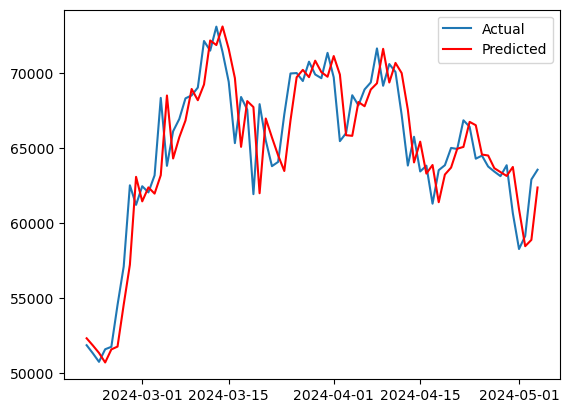

In [13]:
# plot forecasts against actual outcomes

# Mengonversi indeks periode menjadi tanggal
test_dates = test.index.to_timestamp()

# Plot actual outcomes
pyplot.plot(test_dates, test, label='Actual')

# Plot forecasts
pyplot.plot(test_dates, predictions, color='red', label='Predicted')

# Menampilkan legenda
pyplot.legend()

# Menampilkan plot
pyplot.show()